In [3]:
import requests

requests.get('http://www.google.com', timeout=10).ok

True

In [4]:
# setting up the chess envrionment

from kaggle_environments import make

env = make('chess', debug = True)


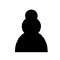
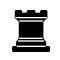
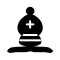
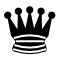
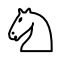
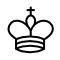
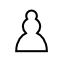
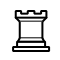
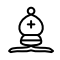
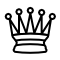
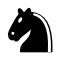
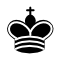

In [10]:
game = env.run(['random', 'king_shuffle'])
env.render(mode = 'ipython', width = 500, height = 500)

In [5]:
dir(env)

['_Environment__agent_runner',
 '_Environment__get_shared_state',
 '_Environment__get_state',
 '_Environment__process_specification',
 '_Environment__run_interpreter',
 '_Environment__set_state',
 '_Environment__state_schema',
 '_Environment__state_schema_value',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__state_schema_0',
 '__state_schema_1',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'agents',
 'clone',
 'configuration',
 'debug',
 'debug_print',
 'done',
 'html_renderer',
 'id',
 'info',
 'interpreter',
 'logs',
 'name',
 'play',
 'pool',
 'render',
 'renderer',
 'reset',
 'run',
 'specification',
 'state',
 'step',
 'steps',
 'toJSON',
 'train',
 'version']

In [6]:
env.agents

{'random': <function kaggle_environments.envs.chess.chess.random_agent(obs)>,
 'king_shuffle': <function kaggle_environments.envs.chess.chess.king_shuffle_agent(obs)>,
 'board_shuffle': <function kaggle_environments.envs.chess.chess.board_shuffle_agent(obs)>}

In [ ]:
# Make an agent


In [ ]:
# Backtest it against random and other agents and itself

## Writing an agent

In [13]:
%%writefile submission.py

from Chessnut import Game
import random

def chess_bot(obs):
    """
    Simple chess bot that prioritizes checkmates, then captures, queen promotions, then randomly moves.

    Args:
        obs: An object with a 'board' attribute representing the current board state as a FEN string.

    Returns:
        A string representing the chosen move in UCI notation (e.g., "e2e4")
    """
    # 0. Parse the current board state and generate legal moves using Chessnut library
    game = Game(obs.board)
    moves = list(game.get_moves())

    # 1. Check a subset of moves for checkmate
    for move in moves[:10]:
        g = Game(obs.board)
        g.apply_move(move)
        if g.status == Game.CHECKMATE:
            return move

    # 2. Check for captures
    for move in moves:
        if game.board.get_piece(Game.xy2i(move[2:4])) != ' ':
            return move

    # 3. Check for queen promotions
    for move in moves:
        if "q" in move.lower():
            return move

    # 4. Random move if no checkmates or captures
    return random.choice(moves)


Writing submission.py
